In [2]:
#imports
import keras as K
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
#preparing data
num_classes = 10
num_features = 784
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data, test_data = np.array(train_data, np.float32), np.array(test_data, np.float32)
train_data, test_data = train_data.reshape([-1, num_features]), test_data.reshape([-1, num_features])
train_data, test_data = train_data / 255., test_data / 255.
x_validate, x_train = train_data[55000:], train_data[:55000]
y_validate, y_train = train_labels[55000:], train_labels[:55000]


#in case i'll want to print labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#creating a model
def create_model(num_neurons, num_layers, activation, optimizer, dropout=0):
    model = Sequential()
    for i in range(num_layers-1):
        if i:
            model.add(Dense(num_neurons, activation=activation))
        else:
            model.add(Dense(num_neurons, activation=activation, input_shape=(num_features,)))
        if dropout:
            model.add(Dropout(dropout))
    if num_layers > 1:
        model.add(Dense(num_classes, activation="softmax"))
    else:
        model.add(Dense(num_classes, activation="softmax", input_shape=(num_features,)))
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    return model

In [5]:
#plotting accuracy and loss
def plot(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

Epoch 1/40
215/215 [==============================] - 9s 32ms/step - loss: 0.8975 - accuracy: 0.6947 - val_loss: 0.5882 - val_accuracy: 0.7836
Epoch 2/40
215/215 [==============================] - 6s 27ms/step - loss: 0.5197 - accuracy: 0.8110 - val_loss: 0.5567 - val_accuracy: 0.7768
Epoch 3/40
215/215 [==============================] - 6s 30ms/step - loss: 0.4639 - accuracy: 0.8319 - val_loss: 0.4492 - val_accuracy: 0.8328
Epoch 4/40
215/215 [==============================] - 6s 28ms/step - loss: 0.4346 - accuracy: 0.8415 - val_loss: 0.4217 - val_accuracy: 0.8478
Epoch 5/40
215/215 [==============================] - 6s 27ms/step - loss: 0.4140 - accuracy: 0.8501 - val_loss: 0.4352 - val_accuracy: 0.8366
Epoch 6/40
215/215 [==============================] - 6s 26ms/step - loss: 0.3980 - accuracy: 0.8559 - val_loss: 0.3940 - val_accuracy: 0.8552
Epoch 7/40
215/215 [==============================] - 6s 28ms/step - loss: 0.3856 - accuracy: 0.8608 - val_loss: 0.3817 - val_accuracy: 0.8610

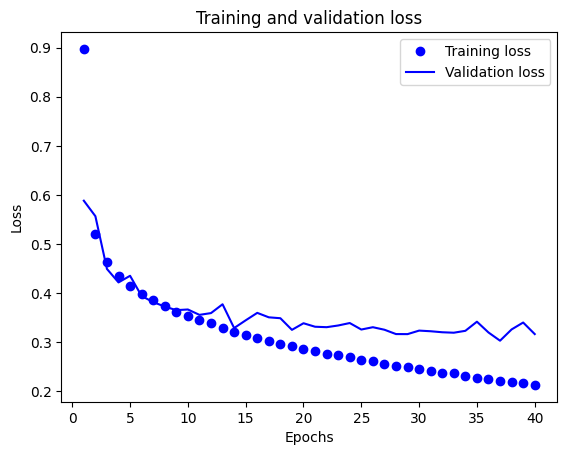

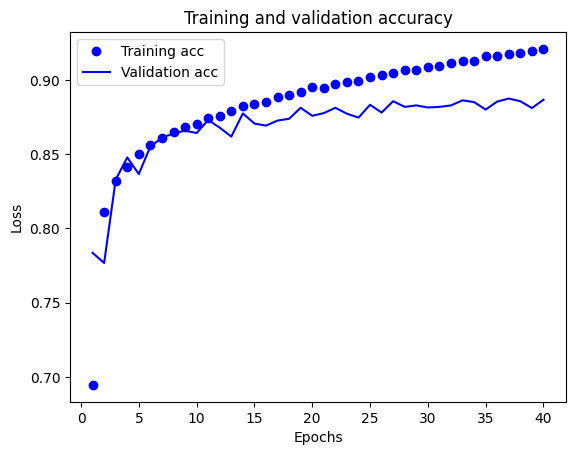

In [6]:
#creating and training first model
#first i will put hyperparameters from previous homework and then adjust as needed
num_layers = 3
num_neurons = 256
activation = "sigmoid"
optimizer = "rmsprop"
epochs = 40
batch_size = 256

model = create_model(num_neurons, num_layers, activation, optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)
#we have what looks like slight overfitting
#And spikes. Lot's of spikes

Epoch 1/20
110/110 [==============================] - 6s 37ms/step - loss: 1.1166 - accuracy: 0.6442 - val_loss: 0.6586 - val_accuracy: 0.7706
Epoch 2/20
110/110 [==============================] - 4s 36ms/step - loss: 0.6046 - accuracy: 0.7791 - val_loss: 0.5321 - val_accuracy: 0.8014
Epoch 3/20
110/110 [==============================] - 4s 38ms/step - loss: 0.5227 - accuracy: 0.8100 - val_loss: 0.5003 - val_accuracy: 0.8214
Epoch 4/20
110/110 [==============================] - 4s 35ms/step - loss: 0.4822 - accuracy: 0.8265 - val_loss: 0.4672 - val_accuracy: 0.8260
Epoch 5/20
110/110 [==============================] - 4s 37ms/step - loss: 0.4570 - accuracy: 0.8339 - val_loss: 0.4366 - val_accuracy: 0.8400
Epoch 6/20
110/110 [==============================] - 4s 36ms/step - loss: 0.4387 - accuracy: 0.8414 - val_loss: 0.4096 - val_accuracy: 0.8502
Epoch 7/20
110/110 [==============================] - 4s 35ms/step - loss: 0.4259 - accuracy: 0.8471 - val_loss: 0.4062 - val_accuracy: 0.8494

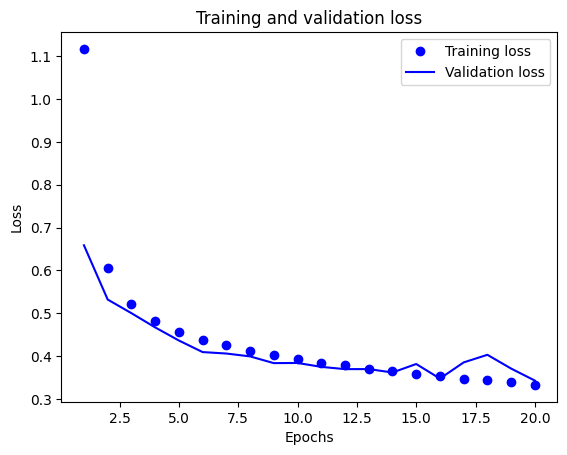

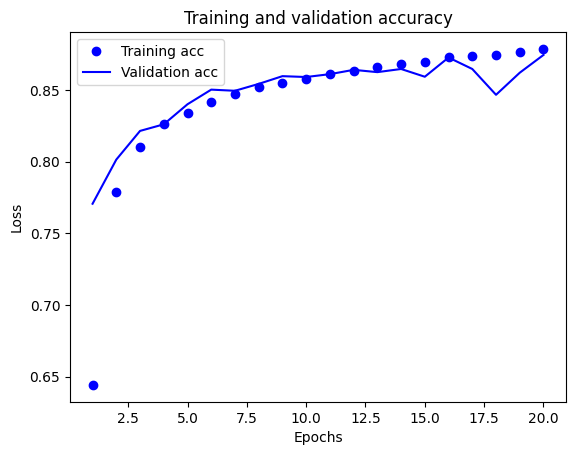

In [7]:
#increasing batch size
#and decreasing number of epochs
epochs = 20
batch_size = 500

model = create_model(num_neurons, num_layers, activation, optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)
#less spikes. Maybe a bit bigger batch size
#What is interesting - overfitting dissapeared

Epoch 1/20
55/55 [==============================] - 5s 57ms/step - loss: 1.4992 - accuracy: 0.5555 - val_loss: 0.9348 - val_accuracy: 0.7142
Epoch 2/20
55/55 [==============================] - 3s 57ms/step - loss: 0.7948 - accuracy: 0.7287 - val_loss: 0.6844 - val_accuracy: 0.7548
Epoch 3/20
55/55 [==============================] - 3s 53ms/step - loss: 0.6376 - accuracy: 0.7667 - val_loss: 0.5836 - val_accuracy: 0.7966
Epoch 4/20
55/55 [==============================] - 3s 54ms/step - loss: 0.5702 - accuracy: 0.7937 - val_loss: 0.5449 - val_accuracy: 0.8012
Epoch 5/20
55/55 [==============================] - 3s 52ms/step - loss: 0.5284 - accuracy: 0.8093 - val_loss: 0.5005 - val_accuracy: 0.8108
Epoch 6/20
55/55 [==============================] - 3s 52ms/step - loss: 0.5024 - accuracy: 0.8178 - val_loss: 0.5374 - val_accuracy: 0.8050
Epoch 7/20
55/55 [==============================] - 3s 52ms/step - loss: 0.4855 - accuracy: 0.8243 - val_loss: 0.4651 - val_accuracy: 0.8300
Epoch 8/20
55

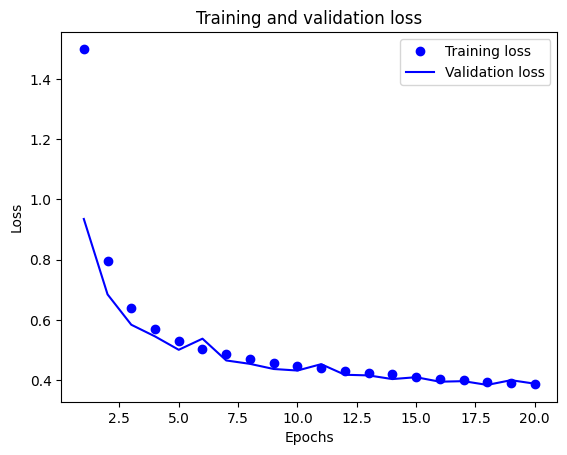

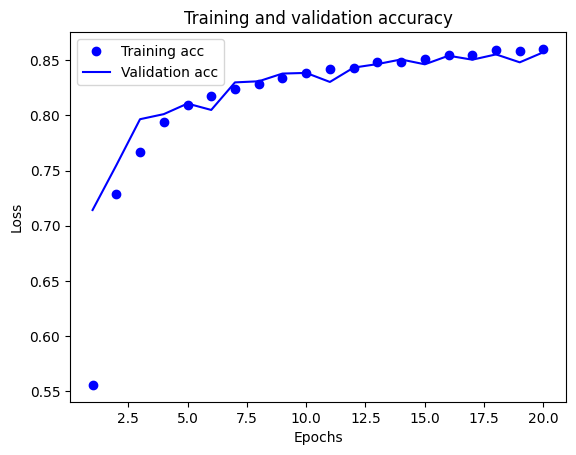

In [8]:
#bigger batch size
batch_size = 1000

model = create_model(num_neurons, num_layers, activation, optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)
#worse accuracy. Will change back.

Epoch 1/20
110/110 [==============================] - 6s 41ms/step - loss: 0.7324 - accuracy: 0.7338 - val_loss: 0.5706 - val_accuracy: 0.7996
Epoch 2/20
110/110 [==============================] - 4s 37ms/step - loss: 0.4776 - accuracy: 0.8257 - val_loss: 0.4500 - val_accuracy: 0.8330
Epoch 3/20
110/110 [==============================] - 4s 37ms/step - loss: 0.4150 - accuracy: 0.8457 - val_loss: 0.3911 - val_accuracy: 0.8568
Epoch 4/20
110/110 [==============================] - 4s 37ms/step - loss: 0.3762 - accuracy: 0.8610 - val_loss: 0.3573 - val_accuracy: 0.8702
Epoch 5/20
110/110 [==============================] - 4s 39ms/step - loss: 0.3503 - accuracy: 0.8703 - val_loss: 0.3521 - val_accuracy: 0.8696
Epoch 6/20
110/110 [==============================] - 4s 38ms/step - loss: 0.3274 - accuracy: 0.8791 - val_loss: 0.3704 - val_accuracy: 0.8672
Epoch 7/20
110/110 [==============================] - 4s 36ms/step - loss: 0.3112 - accuracy: 0.8848 - val_loss: 0.3307 - val_accuracy: 0.8800

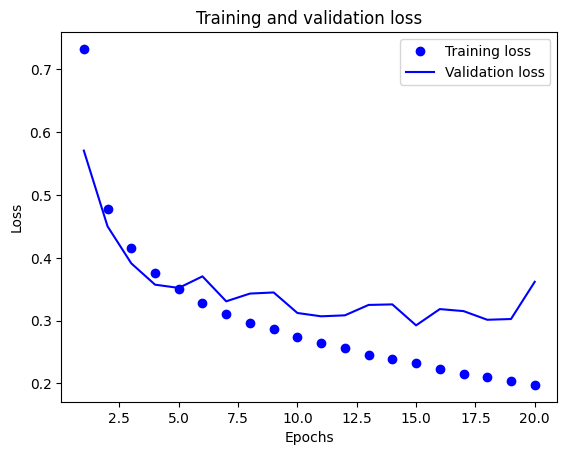

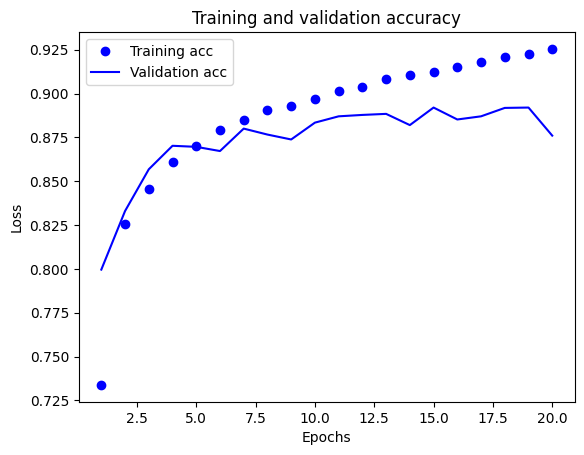

In [9]:
#atempting different activation functions. relu
batch_size = 500
activation = "relu"

model = create_model(num_neurons, num_layers, activation, optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)
#don't see a major difference. Looks a tiny bit more acurate

Epoch 1/20
110/110 [==============================] - 15s 100ms/step - loss: 0.7281 - accuracy: 0.7404 - val_loss: 0.5546 - val_accuracy: 0.7734
Epoch 2/20
110/110 [==============================] - 11s 98ms/step - loss: 0.4628 - accuracy: 0.8304 - val_loss: 0.5554 - val_accuracy: 0.7932
Epoch 3/20
110/110 [==============================] - 10s 95ms/step - loss: 0.4030 - accuracy: 0.8500 - val_loss: 0.3651 - val_accuracy: 0.8672
Epoch 4/20
110/110 [==============================] - 11s 97ms/step - loss: 0.3616 - accuracy: 0.8653 - val_loss: 0.3516 - val_accuracy: 0.8732
Epoch 5/20
110/110 [==============================] - 11s 101ms/step - loss: 0.3383 - accuracy: 0.8731 - val_loss: 0.3707 - val_accuracy: 0.8624
Epoch 6/20
110/110 [==============================] - 11s 98ms/step - loss: 0.3159 - accuracy: 0.8812 - val_loss: 0.3418 - val_accuracy: 0.8724
Epoch 7/20
110/110 [==============================] - 11s 99ms/step - loss: 0.3010 - accuracy: 0.8864 - val_loss: 0.3209 - val_accurac

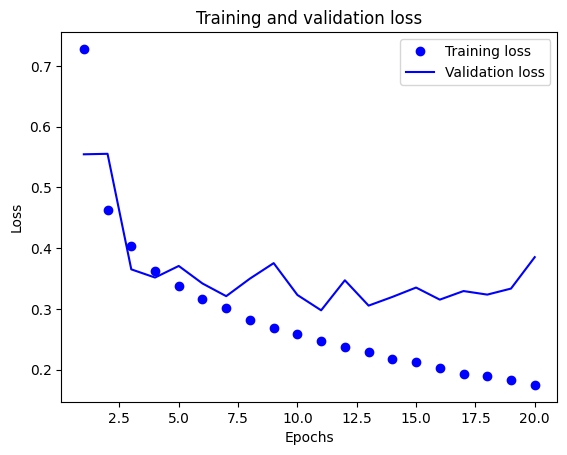

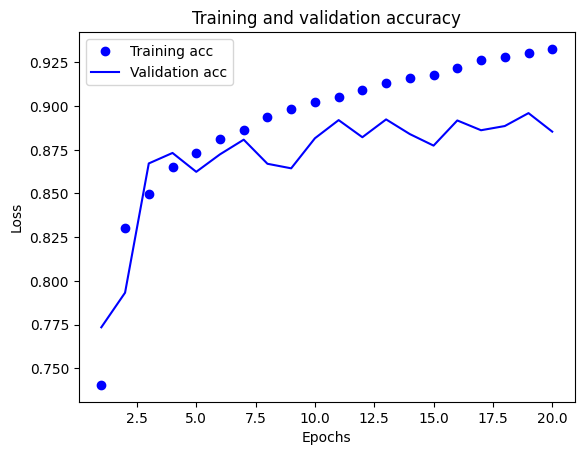

In [10]:
#more neurons
num_neurons = 612

model = create_model(num_neurons, num_layers, activation, optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)

Epoch 1/20
110/110 [==============================] - 26s 204ms/step - loss: 0.8501 - accuracy: 0.6858 - val_loss: 0.5288 - val_accuracy: 0.7936
Epoch 2/20
110/110 [==============================] - 22s 203ms/step - loss: 0.5026 - accuracy: 0.8130 - val_loss: 0.4243 - val_accuracy: 0.8452
Epoch 3/20
110/110 [==============================] - 22s 201ms/step - loss: 0.4257 - accuracy: 0.8419 - val_loss: 0.4697 - val_accuracy: 0.8280
Epoch 4/20
110/110 [==============================] - 22s 202ms/step - loss: 0.3835 - accuracy: 0.8545 - val_loss: 0.3998 - val_accuracy: 0.8580
Epoch 5/20
110/110 [==============================] - 22s 197ms/step - loss: 0.3476 - accuracy: 0.8684 - val_loss: 0.3588 - val_accuracy: 0.8716
Epoch 6/20
110/110 [==============================] - 21s 195ms/step - loss: 0.3296 - accuracy: 0.8746 - val_loss: 0.3661 - val_accuracy: 0.8662
Epoch 7/20
110/110 [==============================] - 21s 190ms/step - loss: 0.3087 - accuracy: 0.8836 - val_loss: 0.3368 - val_ac

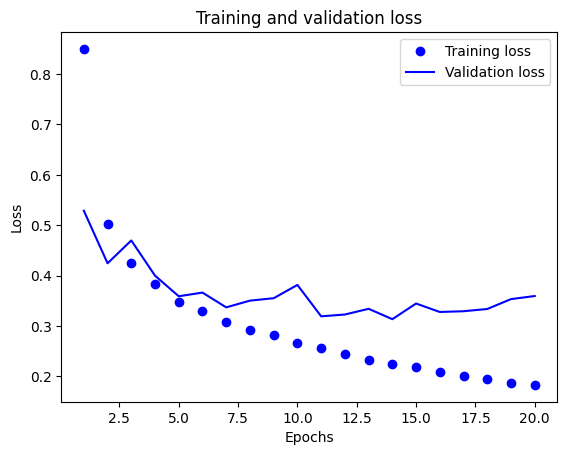

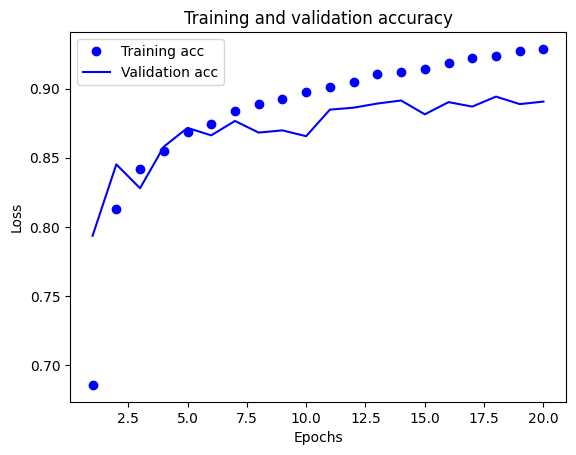

In [11]:
#more layers
num_layers = 5

model = create_model(num_neurons, num_layers, activation, optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)
#accuracy is close to 0.9. And overfitting appeared again.

Epoch 1/20
110/110 [==============================] - 25s 198ms/step - loss: 0.5677 - accuracy: 0.7960 - val_loss: 0.3889 - val_accuracy: 0.8580
Epoch 2/20
110/110 [==============================] - 22s 203ms/step - loss: 0.3746 - accuracy: 0.8635 - val_loss: 0.3736 - val_accuracy: 0.8574
Epoch 3/20
110/110 [==============================] - 22s 200ms/step - loss: 0.3197 - accuracy: 0.8822 - val_loss: 0.3344 - val_accuracy: 0.8798
Epoch 4/20
110/110 [==============================] - 22s 202ms/step - loss: 0.2976 - accuracy: 0.8896 - val_loss: 0.3434 - val_accuracy: 0.8732
Epoch 5/20
110/110 [==============================] - 24s 219ms/step - loss: 0.2755 - accuracy: 0.8984 - val_loss: 0.3155 - val_accuracy: 0.8844
Epoch 6/20
110/110 [==============================] - 23s 210ms/step - loss: 0.2652 - accuracy: 0.9002 - val_loss: 0.3362 - val_accuracy: 0.8816
Epoch 7/20
110/110 [==============================] - 24s 215ms/step - loss: 0.2447 - accuracy: 0.9083 - val_loss: 0.3287 - val_ac

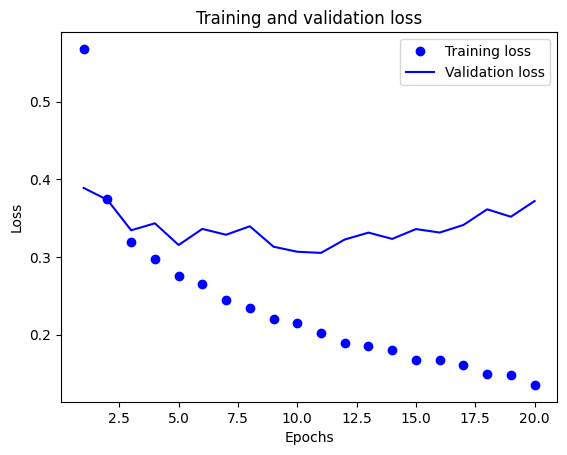

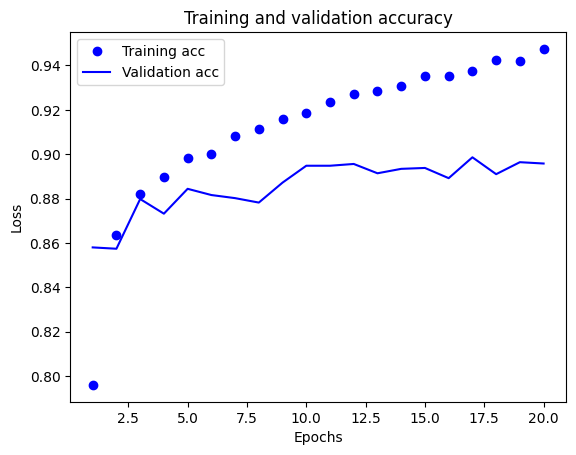

In [12]:
optimizer = 'adam'

model = create_model(num_neurons, num_layers, activation, optimizer)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)
# now this looks like overfitting.

Epoch 1/20
110/110 [==============================] - 29s 233ms/step - loss: 0.6251 - accuracy: 0.7748 - val_loss: 0.3951 - val_accuracy: 0.8586
Epoch 2/20
110/110 [==============================] - 25s 227ms/step - loss: 0.3987 - accuracy: 0.8546 - val_loss: 0.3588 - val_accuracy: 0.8684
Epoch 3/20
110/110 [==============================] - 25s 226ms/step - loss: 0.3604 - accuracy: 0.8680 - val_loss: 0.3577 - val_accuracy: 0.8686
Epoch 4/20
110/110 [==============================] - 23s 212ms/step - loss: 0.3359 - accuracy: 0.8786 - val_loss: 0.3460 - val_accuracy: 0.8712
Epoch 5/20
110/110 [==============================] - 24s 216ms/step - loss: 0.3162 - accuracy: 0.8818 - val_loss: 0.3228 - val_accuracy: 0.8800
Epoch 6/20
110/110 [==============================] - 24s 214ms/step - loss: 0.3049 - accuracy: 0.8885 - val_loss: 0.3067 - val_accuracy: 0.8878
Epoch 7/20
110/110 [==============================] - 26s 233ms/step - loss: 0.2961 - accuracy: 0.8900 - val_loss: 0.3211 - val_ac

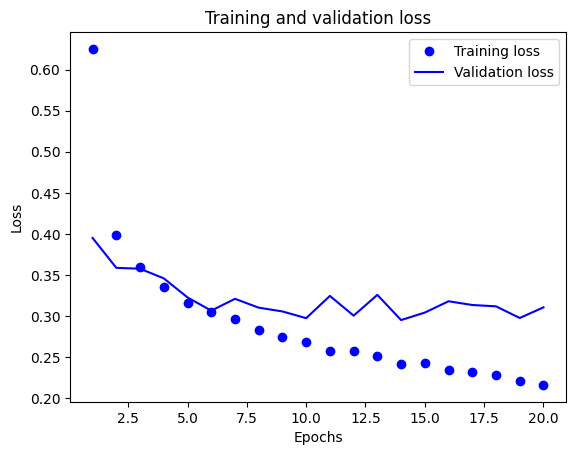

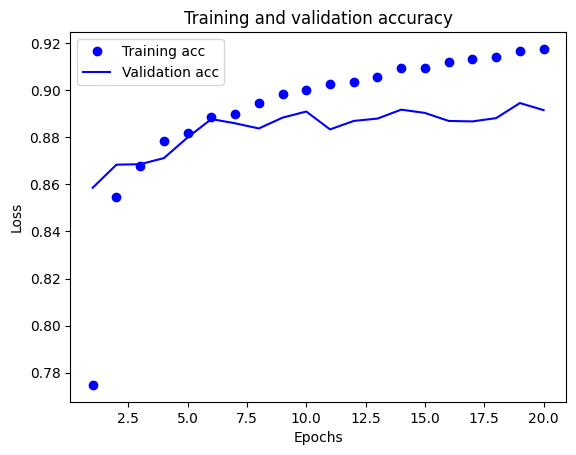

In [13]:
#adding dropout
dropout = 0.2

model = create_model(num_neurons, num_layers, activation, optimizer, dropout=dropout)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)
#accuracy is barely below 0.9

Epoch 1/20
110/110 [==============================] - 39s 314ms/step - loss: 0.7070 - accuracy: 0.7318 - val_loss: 0.4133 - val_accuracy: 0.8490
Epoch 2/20
110/110 [==============================] - 34s 309ms/step - loss: 0.4138 - accuracy: 0.8518 - val_loss: 0.3778 - val_accuracy: 0.8624
Epoch 3/20
110/110 [==============================] - 35s 314ms/step - loss: 0.3714 - accuracy: 0.8648 - val_loss: 0.3542 - val_accuracy: 0.8674
Epoch 4/20
110/110 [==============================] - 34s 313ms/step - loss: 0.3523 - accuracy: 0.8716 - val_loss: 0.3335 - val_accuracy: 0.8732
Epoch 5/20
110/110 [==============================] - 33s 303ms/step - loss: 0.3384 - accuracy: 0.8774 - val_loss: 0.3183 - val_accuracy: 0.8800
Epoch 6/20
110/110 [==============================] - 34s 306ms/step - loss: 0.3198 - accuracy: 0.8848 - val_loss: 0.3175 - val_accuracy: 0.8808
Epoch 7/20
110/110 [==============================] - 38s 349ms/step - loss: 0.3143 - accuracy: 0.8863 - val_loss: 0.3159 - val_ac

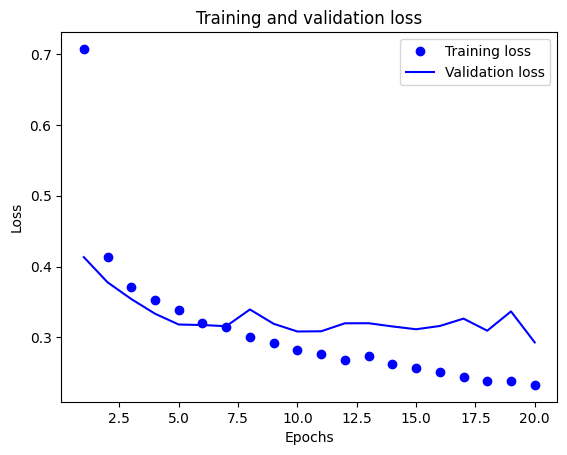

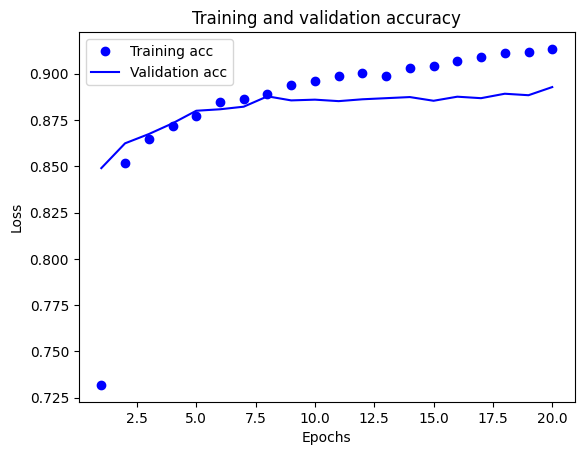

In [14]:
#a couple more layers.
num_layers = 7

model = create_model(num_neurons, num_layers, activation, optimizer, dropout=dropout)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)

Epoch 1/20
110/110 [==============================] - 79s 668ms/step - loss: 0.9215 - accuracy: 0.6368 - val_loss: 0.4967 - val_accuracy: 0.8102
Epoch 2/20
110/110 [==============================] - 75s 681ms/step - loss: 0.5178 - accuracy: 0.8079 - val_loss: 0.4163 - val_accuracy: 0.8502
Epoch 3/20
110/110 [==============================] - 76s 690ms/step - loss: 0.4429 - accuracy: 0.8420 - val_loss: 0.4002 - val_accuracy: 0.8630
Epoch 4/20
110/110 [==============================] - 74s 671ms/step - loss: 0.4186 - accuracy: 0.8520 - val_loss: 0.3852 - val_accuracy: 0.8632
Epoch 5/20
110/110 [==============================] - 74s 677ms/step - loss: 0.3919 - accuracy: 0.8603 - val_loss: 0.3802 - val_accuracy: 0.8686
Epoch 6/20
110/110 [==============================] - 75s 685ms/step - loss: 0.3789 - accuracy: 0.8657 - val_loss: 0.3726 - val_accuracy: 0.8736
Epoch 7/20
110/110 [==============================] - 78s 705ms/step - loss: 0.3686 - accuracy: 0.8694 - val_loss: 0.3763 - val_ac

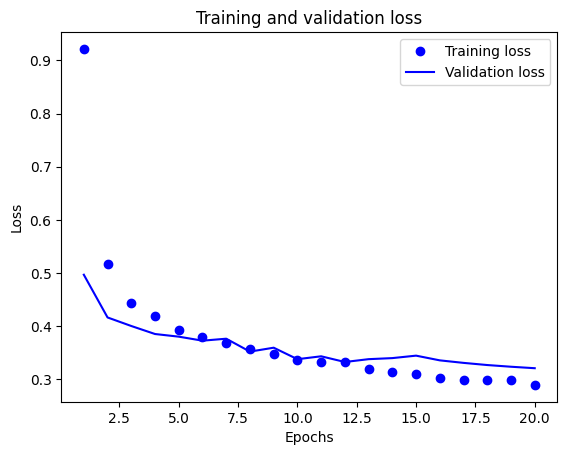

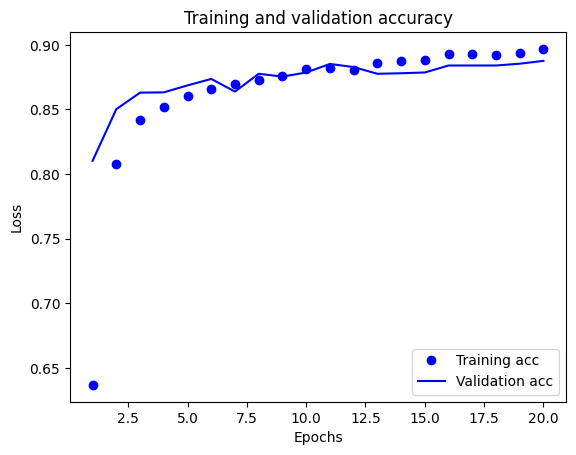

In [15]:
#more complexity, higher dropout
dropout = 0.3
num_layers = 9
num_neurons = 800

model = create_model(num_neurons, num_layers, activation, optimizer, dropout=dropout)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_validate, y_validate))
plot(history)

In [16]:
#So I looked what others were writing about this in slack. They also couldn't break through 89% using Dense layers
#Using CNN. Which we should learn next week...
